# Python For Calculus

### Author: Santosh Muthireddy, Divin Devaiah

# Requirements
* Numpy
* Sympy
* Matplotlib
* python3


In [2]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

# Slope and Derivatives

In [16]:
#Generate data using linspace

data_x = np.linspace(0,10,100)

x = sp.Symbol('x')
y = sp.Function(x)

y = 1 / (1+sp.exp(-(x-4)))
y

1/(exp(4 - x) + 1)

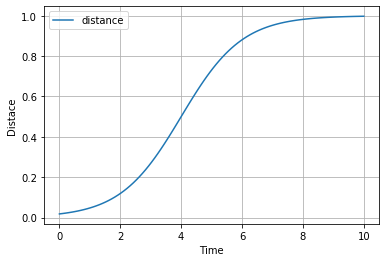

In [20]:
# Substitute x values in y function and plot
data_y = [y.evalf(subs={x:i}) for i in data_x]

plt.figure()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Distace")
plt.plot(data_x,data_y,label="distance")
plt.legend()

In [17]:
# First order derivative of function y
y_prime_1 = y.diff(x,1)
y_prime_1

exp(4 - x)/(exp(4 - x) + 1)**2

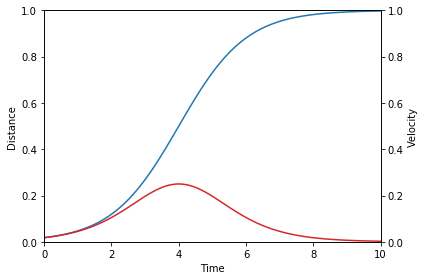

In [21]:
# Substitute values in y_prime and plot
data_y_prime = [y_prime_1.evalf(subs={x:i}) for i in data_x]

fig, ax1 = plt.subplots()
ax1.plot(data_x,data_y,label = "distance",color="tab:blue")
ax1.set_ylabel("Distance")
ax1.set_xlabel("Time")
ax1.set_ylim(0,1)
ax1.set_xlim(0,10)
ax2 = ax1.twinx()
ax2.plot(data_x,data_y_prime,label="velocity",color="tab:red")
ax2.set_ylabel("Velocity")
ax2.set_ylim(0,1)
ax2.set_xlim(0,10)
fig.tight_layout() 

# Derivative of non-linear function

In [23]:
#Generate x data again using linspace 
data_x = np.linspace(0,10,100)

x = sp.Symbol('x')
y = sp.Function(x)

y = x**2
y

x**2

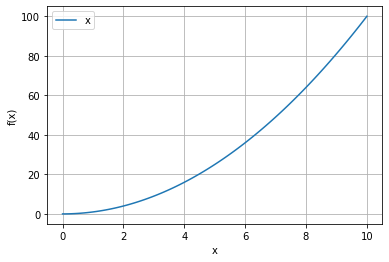

In [24]:
data_y = [y.evalf(subs={x:i}) for i in data_x]

plt.figure()
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(data_x,data_y,label="x")
plt.legend()

In [25]:
y_prime = y.diff(x,1)
y_prime

2*x

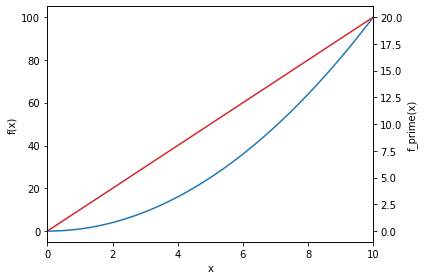

In [26]:
data_y_prime = [y_prime.evalf(subs={x:i}) for i in data_x]

fig, ax1 = plt.subplots()
ax1.plot(data_x,data_y,label = "f(x)",color="tab:blue")
ax1.set_ylabel("f(x)")
ax1.set_xlabel("x")
ax1.set_xlim(0,10)
ax2 = ax1.twinx()
ax2.plot(data_x,data_y_prime,label="f_prime(x)",color="tab:red")
ax2.set_ylabel("f_prime(x)")
ax2.set_xlim(0,10)
fig.tight_layout() 

In [27]:
# u = Function(x)
x = sp.Symbol('x')
u = sp.Function(x)
u = x**3
u

x**3

In [28]:
# first order derivative du/dx
dudx = u.diff(x,1)
dudx

3*x**2

In [29]:
# v = Function(u)
u = sp.Symbol('u')
v = sp.Function(u)
v = u**2
v

u**2

In [133]:
# first order derivative dv/du
dvdu = v.diff(u)
dvdu

2*u

In [134]:
# substitute u=x^3
dvdu.subs(u,x**3)

2*x**3

In [135]:
# Chain rule: dv/dx = du/dx*dv/du
dvdx = dudx*dvdu
dvdx

6*u*x**2

In [136]:
# substitue u=x^3
dvdx.subs(u,x**3)

6*x**5

# Higher order derivatives

In [140]:
localhost:8888/notebooks/calculusSimonDeussen/mas-ws-20t = sp.Symbol('t')
distance = sp.Function(t)

distance = t**4
distance

t**4

In [142]:
# First order derivative
velocity = distance.diff(t,1)
velocity

4*t**3

In [143]:
# Second order derivative
acceleration = distance.diff(t,2)
acceleration

12*t**2

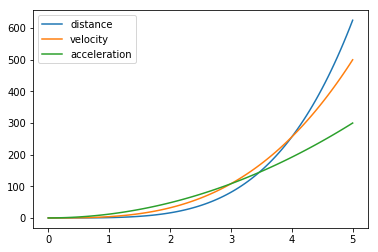

In [147]:
data_t = np.linspace(0,5,100)

distance_subs = [distance.evalf(subs={t:i}) for i in data_t]
velocity_subs = [velocity.evalf(subs={t:i}) for i in data_t]
acceleration_subs = [acceleration.evalf(subs={t:i}) for i in data_t]

plt.plot(data_t,distance_subs,label='distance')
plt.plot(data_t,velocity_subs,label="velocity")
plt.plot(data_t,acceleration_subs,label="acceleration")
plt.legend()
plt.show()

# Integrals

In [268]:
data_x = np.linspace(0,10,100)
x = sp.Symbol('x')
y = sp.Function('y')(x)

# derivative of y w.r.t x
y_prime = sp.Derivative(y,x)
y_1 = 1 / (1+sp.exp(-(x-4)))
print(y_1.evalf(subs={x:0}))
# y' = e^(4-x)/(1+e^(4-x))^2
eq = y_prime - y_1.diff(x,1)
eq

0.0179862099620916


Derivative(y(x), x) - exp(4 - x)/(exp(4 - x) + 1)**2

In [262]:
# solve the equation
sp.dsolve(eq)

Eq(y(x), C1 - exp(4)/(exp(x) + exp(4)))

In [286]:
# Sloving the integral with intial value
sol = sp.dsolve(eq,ics={y.subs(x,0):0.017986})
sol

Eq(y(x), 0.999999790037908 - exp(4)/(exp(x) + exp(4)))

In [287]:
sp.simplify(sol)

Eq(y(x), (0.999999790037908*exp(x) - 2.09962091601845e-7*exp(4))/(exp(x) + exp(4)))

In [15]:
y = sp.Function(x)
print(type(y))
y = sp.log(x + sp.exp(x))
print(type(y))

y

<class 'sympy.core.function.UndefinedFunction'>
log


log(x + exp(x))

In [51]:
x = sp.Symbol('x')
y = sp.Function('y')(x)

y_prime = sp.Derivative(y,x)                    # first Derivative
y_second_prime = sp.Derivative(y_prime, x)      # second Derivative

y_1 = 1 / (1+sp.exp(-(x-4)))                    # sigmoid function 

eq = y_second_prime - y_1.diff(x,2)             # second derivative of y == second derivatice from y_1 
# sp.dsolve(eq)                                 # solving without initial values creates two constants

# with initial values from malika we can solve these constants:
sp.dsolve(eq, ics={y.subs(x,0): 1, y.diff(x,1).subs(x, 0): 1})

Eq(y(x), x*(1 + exp(4) + exp(8))/(1 + 2*exp(4) + exp(8)) + (1 + 2*exp(4))/(1 + exp(4)) - exp(4)/(sqrt(exp(2*x)) + exp(4)))

Eq(y(x), C1 + C2*x - exp(4)/(sqrt(exp(2*x)) + exp(4)))

In [42]:
a = sp.dsolve(eq, ics={y.subs(x,0): 1, y.diff(x,1).subs(x, 0): 1})

In [43]:
sp.simplify(a)

Eq(y(x), x*(1 + exp(4) + exp(8))/(1 + 2*exp(4) + exp(8)) + (1 + 2*exp(4))/(1 + exp(4)) - exp(4)/(sqrt(exp(2*x)) + exp(4)))